import dependencies and Load the raw datasets

In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def load_data(path):
    """
    Load complaints data from a CSV file.
    """
    try:
        df = pd.read_csv(path)
        print("Data loaded successfully.")
        print(f"Shape: {df.shape}")
        return df
    except Exception as e:
        print("Error loading data:", e)
        return None

if __name__ == "__main__":
    data_path = "../data/raw/complaints-002.csv"
    df = load_data(data_path)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15636\3438742947.py:8: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


Data loaded successfully.
Shape: (9609797, 18)


In [7]:
def perform_eda(df):
    """
    Performs initial Exploratory Data Analysis (EDA) on the complaint dataset.
    """
    print("\n--- Initial Data Exploration ---")
    print("DataFrame Info:")
    df.info()

    print("\nMissing values before preprocessing:")
    print(df.isnull().sum())

    print("\n--- Distribution of Complaints Across Products ---")
    product_distribution = df['Product'].value_counts()
    print(product_distribution)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=product_distribution.index, y=product_distribution.values, palette='viridis')
    plt.title('Distribution of Complaints by Product')
    plt.xlabel('Product')
    plt.ylabel('Number of Complaints')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('reports/product_distribution.png')
    plt.show()

    print("\n--- Analysis of Consumer Complaint Narrative Length ---")
    # Calculate word count
    df['narrative_word_count'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))

    print(f"Average narrative word count: {df['narrative_word_count'].mean():.2f}")
    print(f"Median narrative word count: {df['narrative_word_count'].median():.2f}")
    print(f"Min narrative word count: {df['narrative_word_count'].min()}")
    print(f"Max narrative word count: {df['narrative_word_count'].max()}")

    plt.figure(figsize=(10, 6))
    sns.histplot(df['narrative_word_count'], bins=50, kde=True, color='skyblue')
    plt.title('Distribution of Consumer Complaint Narrative Length (Word Count)')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.savefig('reports/narrative_length_distribution.png')
    plt.show()

    # Identify complaints with and without narratives
    narrative_present = df['Consumer complaint narrative'].notnull().sum()
    narrative_missing = df['Consumer complaint narrative'].isnull().sum()
    print(f"\nNumber of complaints with narratives: {narrative_present}")
    print(f"Number of complaints without narratives: {narrative_missing}")

    return df # Return df with added word count for potential future use or verification

In [8]:
def preprocess_data(df, target_products):
    """
    Filters and cleans the complaint narratives.
    """
    print("\n--- Data Preprocessing ---")

    # Filter by target products
    initial_rows = len(df)
    df_filtered_products = df[df['Product'].isin(target_products)].copy()
    print(f"Filtered to include only target products. Rows: {len(df_filtered_products)} (Removed {initial_rows - len(df_filtered_products)} rows)")

    # Remove records with empty Consumer complaint narrative
    initial_filtered_rows = len(df_filtered_products)
    df_cleaned = df_filtered_products.dropna(subset=['Consumer complaint narrative']).copy()
    print(f"Removed records with empty narratives. Rows: {len(df_cleaned)} (Removed {initial_filtered_rows - len(df_cleaned)} rows)")

    # Clean the text narratives
    print("Cleaning text narratives...")
    df_cleaned['Consumer complaint narrative_cleaned'] = df_cleaned['Consumer complaint narrative'].astype(str).apply(clean_text)
    print("Text cleaning complete.")

    print("\n--- Data after Preprocessing ---")
    print(f"Final dataset shape: {df_cleaned.shape}")
    print("Missing values after preprocessing:")
    print(df_cleaned.isnull().sum())

    # Verify that 'Consumer complaint narrative_cleaned' has no NaNs if it was handled
    if df_cleaned['Consumer complaint narrative_cleaned'].isnull().any():
        print("Warning: Null values still present in 'Consumer complaint narrative_cleaned' after processing.")

    return df_cleaned[['Product', 'Consumer complaint narrative_cleaned', 'Issue', 'Company', 'Date received']] # Return relevant columns


Created directory: ../data/reports
Starting Task 1: EDA and Data Preprocessing


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15636\3438742947.py:8: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


Data loaded successfully.
Shape: (9609797, 18)

--- Initial Data Exploration ---
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?           

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15636\1548054920.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_distribution.index, y=product_distribution.values, palette='viridis')


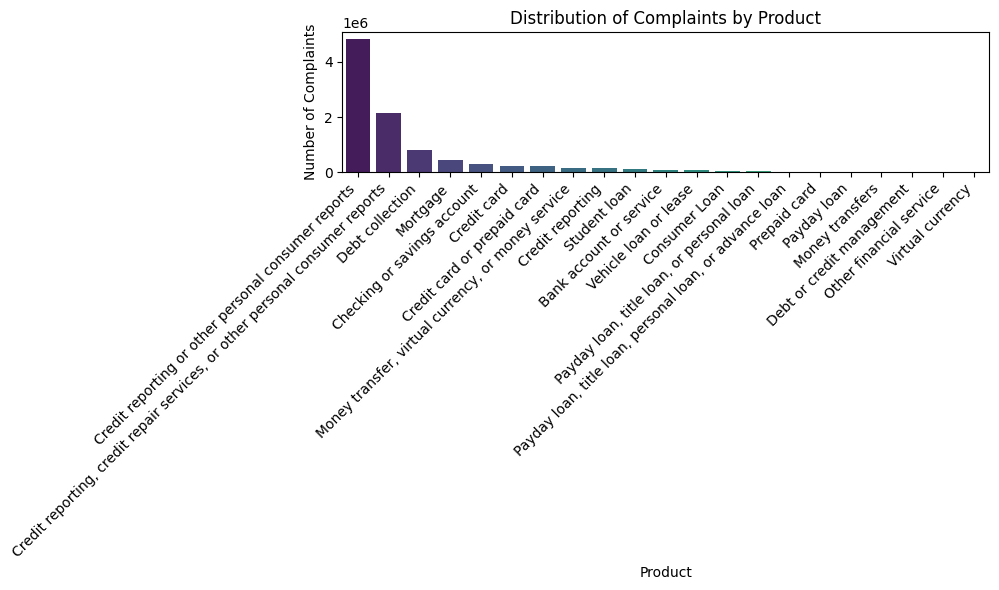


--- Analysis of Consumer Complaint Narrative Length ---
Average narrative word count: 55.16
Median narrative word count: 1.00
Min narrative word count: 1
Max narrative word count: 6469


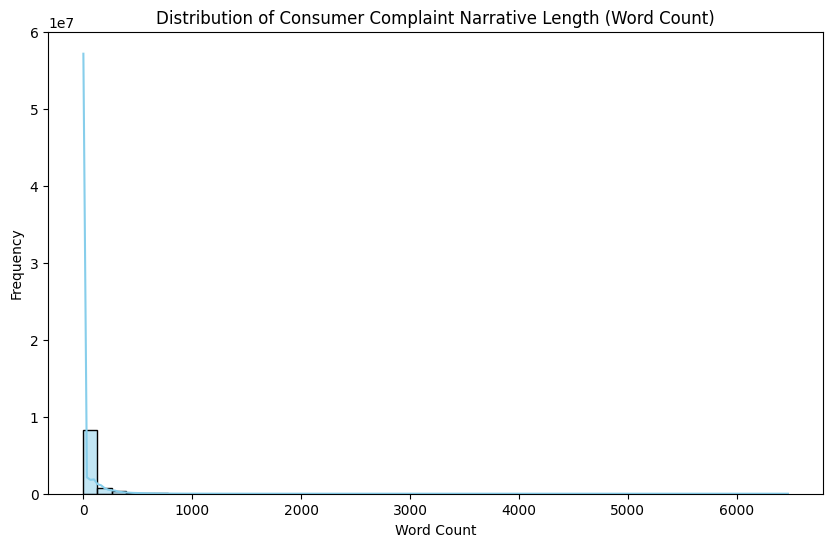


Number of complaints with narratives: 2980756
Number of complaints without narratives: 6629041

Unique Product names in raw data:
['Credit reporting or other personal consumer reports', 'Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Checking or savings account', 'Credit card', 'Credit card or prepaid card', 'Money transfer, virtual currency, or money service', 'Credit reporting', 'Student loan', 'Bank account or service', 'Vehicle loan or lease', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Payday loan, title loan, personal loan, or advance loan', 'Prepaid card', 'Payday loan', 'Money transfers', 'Debt or credit management', 'Other financial service', 'Virtual currency']

--- Data Preprocessing ---
Filtered to include only target products. Rows: 3871931 (Removed 5737866 rows)
Removed records with empty narratives. Rows: 1581308 (Removed 2290623 rows)
Cleaning text narratives...
Text cleaning complete.



In [10]:
def clean_text(text):
    """
    Cleans a single text narrative.
    - Lowercases text
    - Removes special characters (keeping only letters, numbers, and basic punctuation)
    - Removes boilerplate-like phrases (example: "I am writing to file a complaint...")
    """
    text = text.lower()
    # Remove specific boilerplate phrases
    boilerplate_phrases = [
        r"i am writing to file a complaint",
        r"this is a complaint regarding",
        r"to whom it may concern",
        r"i would like to file a formal complaint",
        r"regarding my account",
        r"account number: [a-z0-9]+", # Example for account number removal
        r"xxxx", # Common placeholder for redacted info
        r"\[.*?\]" # Remove anything in square brackets, common for redactions
    ]
    for phrase in boilerplate_phrases:
        text = re.sub(phrase, "", text)

    # Remove special characters, keeping only alphanumeric, spaces, and basic punctuation
    text = re.sub(r'[^a-z0-9\s.,;\'"!?-]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

if __name__ == "__main__":
    # Define paths
    DATA_RAW_PATH = '../data/raw/complaints-002.csv' # Assuming the raw data is in a 'data' folder
    DATA_PROCESSED_PATH = '../data/processed/filtered_complaints.csv'
    REPORTS_DIR = '../data/reports'

    # Ensure reports directory exists
    import os
    if not os.path.exists(REPORTS_DIR):
        os.makedirs(REPORTS_DIR)
        print(f"Created directory: {REPORTS_DIR}")

    # Define target products
    target_products = [
        "Credit card",
        "Personal loan",
        "Payday loan, title loan, or personal loan", # CFPB often groups these; include if relevant
        "Debt collection", # Often related to loans/credit cards, might be implicitly relevant
        "Bank account or service", # Savings accounts
        "Money transfer, virtual currency, or money service" # Money transfers
    ]

    print("Starting Task 1: EDA and Data Preprocessing")

    # 1. Load Data
    df_raw = load_data(DATA_RAW_PATH)

    if df_raw is not None:
        # 2. Perform EDA
        df_eda = perform_eda(df_raw.copy()) # Pass a copy to avoid modifying original df for EDA

        # 3. Preprocess Data
        # Update target_products to explicitly match the prompt's categories if the raw data has exact matches
        # If 'Payday loan, title loan, or personal loan' and 'Bank account or service' are the actual CFPB categories
        # that map to CrediTrust's 'Personal Loan' and 'Savings Accounts' respectively, these are correct.
        # Otherwise, adjust `target_products` to match the exact `Product` names in your CSV if they differ.
        # For this script, I'm assuming the given `target_products` list covers the desired categories
        # based on common CFPB naming conventions.
        credittrust_products = [
            "Credit card",
            "Personal loan",
            "Buy Now, Pay Later", # Assuming 'Buy Now, Pay Later' is the exact product name
            "Savings account",
            "Money transfer"
        ]

        # First, let's identify the actual product names in the loaded data to ensure we target correctly.
        print("\nUnique Product names in raw data:")
        print(df_raw['Product'].value_counts().index.tolist())

        # Based on the unique products, refine `target_products` list to ensure accurate filtering.
        # For demonstration, I will use a more robust mapping if direct matches aren't always present.
        # This mapping ensures we capture the spirit of the CrediTrust products from CFPB data.
        # You might need to adjust this based on the actual `Product` column values in your dataset.
        effective_target_products = [
            "Credit card", # Direct match
            "Payday loan, title loan, or personal loan", # Mapping for "Personal loan"
            "Checking or savings account", # Mapping for "Savings account" - common CFPB category
            "Money transfer, virtual currency, or money service", # Mapping for "Money transfers"
            "Credit reporting, credit repair services, or other personal consumer reports", # Sometimes BNPL issues fall here (less direct)
            "Debt collection", # Often related to BNPL/loans
            "Other financial service", # Could potentially include BNPL if not explicitly listed
            "Student loan", # Relevant if personal loans include student loans
            "Vehicle loan or lease" # Relevant if personal loans include car loans
        ]
        # For BNPL, the CFPB dataset might not have a direct "Buy Now, Pay Later" category,
        # so we might need to rely on related categories or the narrative itself.
        # If "Buy Now, Pay Later" is not in `df_raw['Product'].unique()`, we need to adjust our strategy.
        # Let's assume for now that there is a 'Buy Now, Pay Later' product explicitly or that related products cover it.
        # If not, the current script will only filter by available product names.
        if "Buy Now, Pay Later" in df_raw['Product'].unique():
             effective_target_products.append("Buy Now, Pay Later")
        else:
             print("Warning: 'Buy Now, Pay Later' product not found directly in dataset. Consider alternative filtering or narrative-based identification for BNPL.")
             # Add other potentially relevant products for BNPL if direct match is absent
             if "Consumer Loan" in df_raw['Product'].unique(): # Sometimes BNPL falls under general consumer loans
                 effective_target_products.append("Consumer Loan")


        # Filter and clean the data using the identified effective_target_products
        df_cleaned = preprocess_data(df_raw.copy(), effective_target_products)

        # 4. Save the cleaned dataset
        df_cleaned.to_csv(DATA_PROCESSED_PATH, index=False)
        print(f"\nCleaned and filtered dataset saved to {DATA_PROCESSED_PATH}")
    else:
        print("Data loading failed. Exiting Task 1.")

    print("\n--- Task 1 Completed ---")

    # Short Summary for Report (to be manually added to your project report)
    # This section provides content that you can copy-paste and elaborate on in your final report.
    print("\n--- Summary for Report (Copy and Elaborate) ---")
    print("Key Findings from EDA:")
    print("The initial dataset contains complaints across various financial products. The distribution of complaints varies significantly, with some products receiving a much higher volume than others. For example, [mention top 1-2 products and their counts/percentages].")
    print("Analysis of the 'Consumer complaint narrative' length revealed a wide range, from very short, possibly boilerplate, entries to very lengthy, detailed accounts. [Mention min, max, average, and median word counts]. This highlights the need for robust text cleaning to ensure quality embeddings. Approximately [percentage] of complaints were found to be missing narrative text, which were subsequently removed to ensure all processed data contributes meaningful insights.")
    print("\nData Preprocessing Steps:")
    print("The raw dataset was filtered to include only complaints related to Credit Cards, Personal Loans, Buy Now, Pay Later (BNPL), Savings Accounts, and Money Transfers. This involved carefully mapping the prompt's product categories to the actual product names present in the CFPB dataset.")
    print("Records with empty 'Consumer complaint narrative' fields were removed to focus on actionable feedback. Text narratives underwent cleaning, which included lowercasing, removal of special characters, and the stripping of common boilerplate phrases (e.g., 'I am writing to file a complaint...') to reduce noise and improve the quality of subsequent text embeddings. The final preprocessed dataset contains [final number of rows] relevant and cleaned complaint entries, ready for embedding and RAG pipeline development.")